In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import show_images, mask_img

src = cv2.imread('./image/cow.jpg', -1)

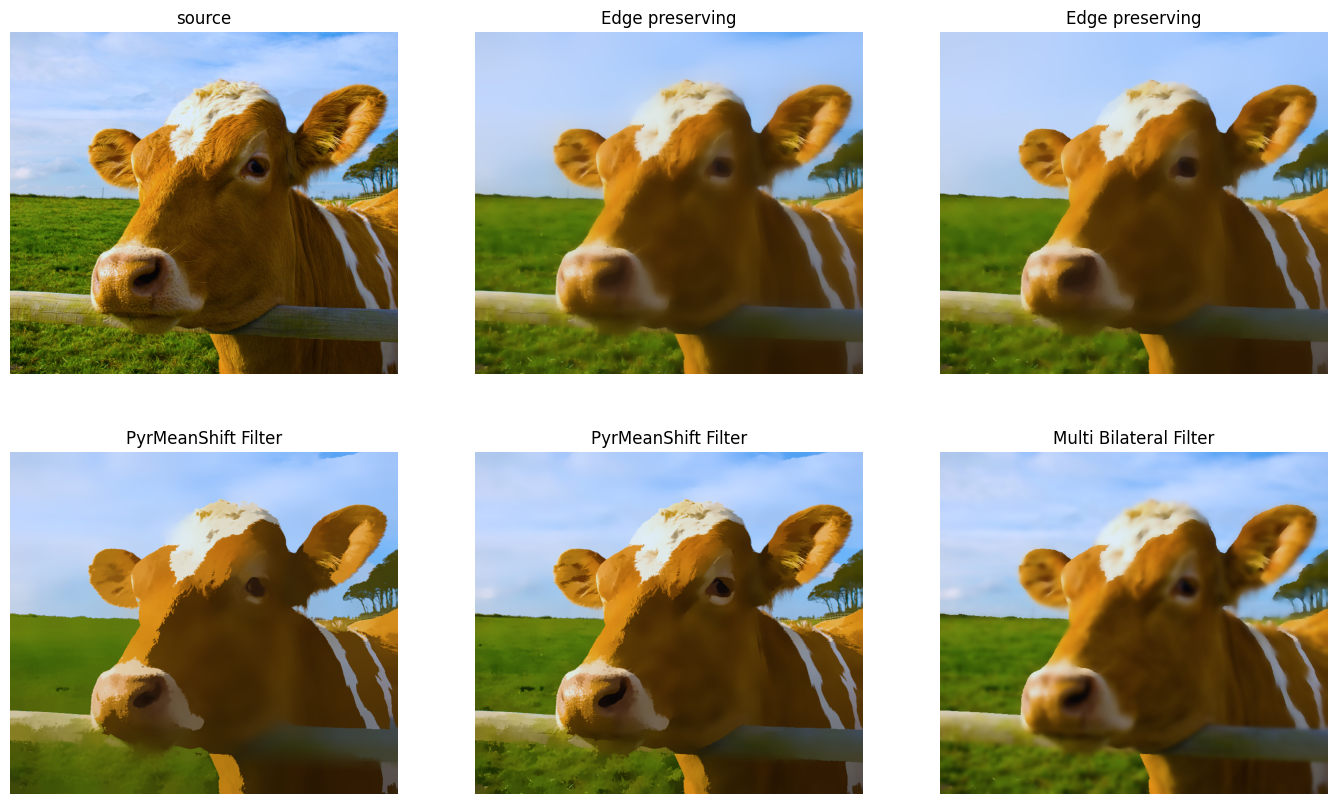

In [2]:
# 水彩画风格：成块状，块与块之间没有突兀的黑边

# 频域上的保边滤波 edgePreserving；速度相当快，其中 RECURS 速度好于 NORMCONV
out1 = cv2.edgePreservingFilter(src, flags=cv2.RECURS_FILTER, sigma_s=100, sigma_r=0.5)
out2 = cv2.edgePreservingFilter(src, flags=cv2.NORMCONV_FILTER, sigma_s=100, sigma_r=0.5)

# Meanshift + Pyramid
out3 = cv2.pyrMeanShiftFiltering(src, 21, 51)
out4 = cv2.pyrMeanShiftFiltering(src, 11, 31)

# 多次在空域上保边滤波，很慢（可以用金字塔来加速）
out5 = np.copy(src)
# for _ in range(1):
#     out5 = cv2.pyrDown(out5)
for _ in range(7):
    out5 = cv2.bilateralFilter(out5, d=7, sigmaSpace=75, sigmaColor=70)
# for _ in range(1):
#     out5 = cv2.pyrUp(out5)


show_images([
    ('source', src),
    ('Edge preserving', out1),
    ('Edge preserving', out2),
    ('PyrMeanShift Filter', out3),
    ('PyrMeanShift Filter', out4),
    ('Multi Bilateral Filter', out5),
], colnum=3, scale=10)

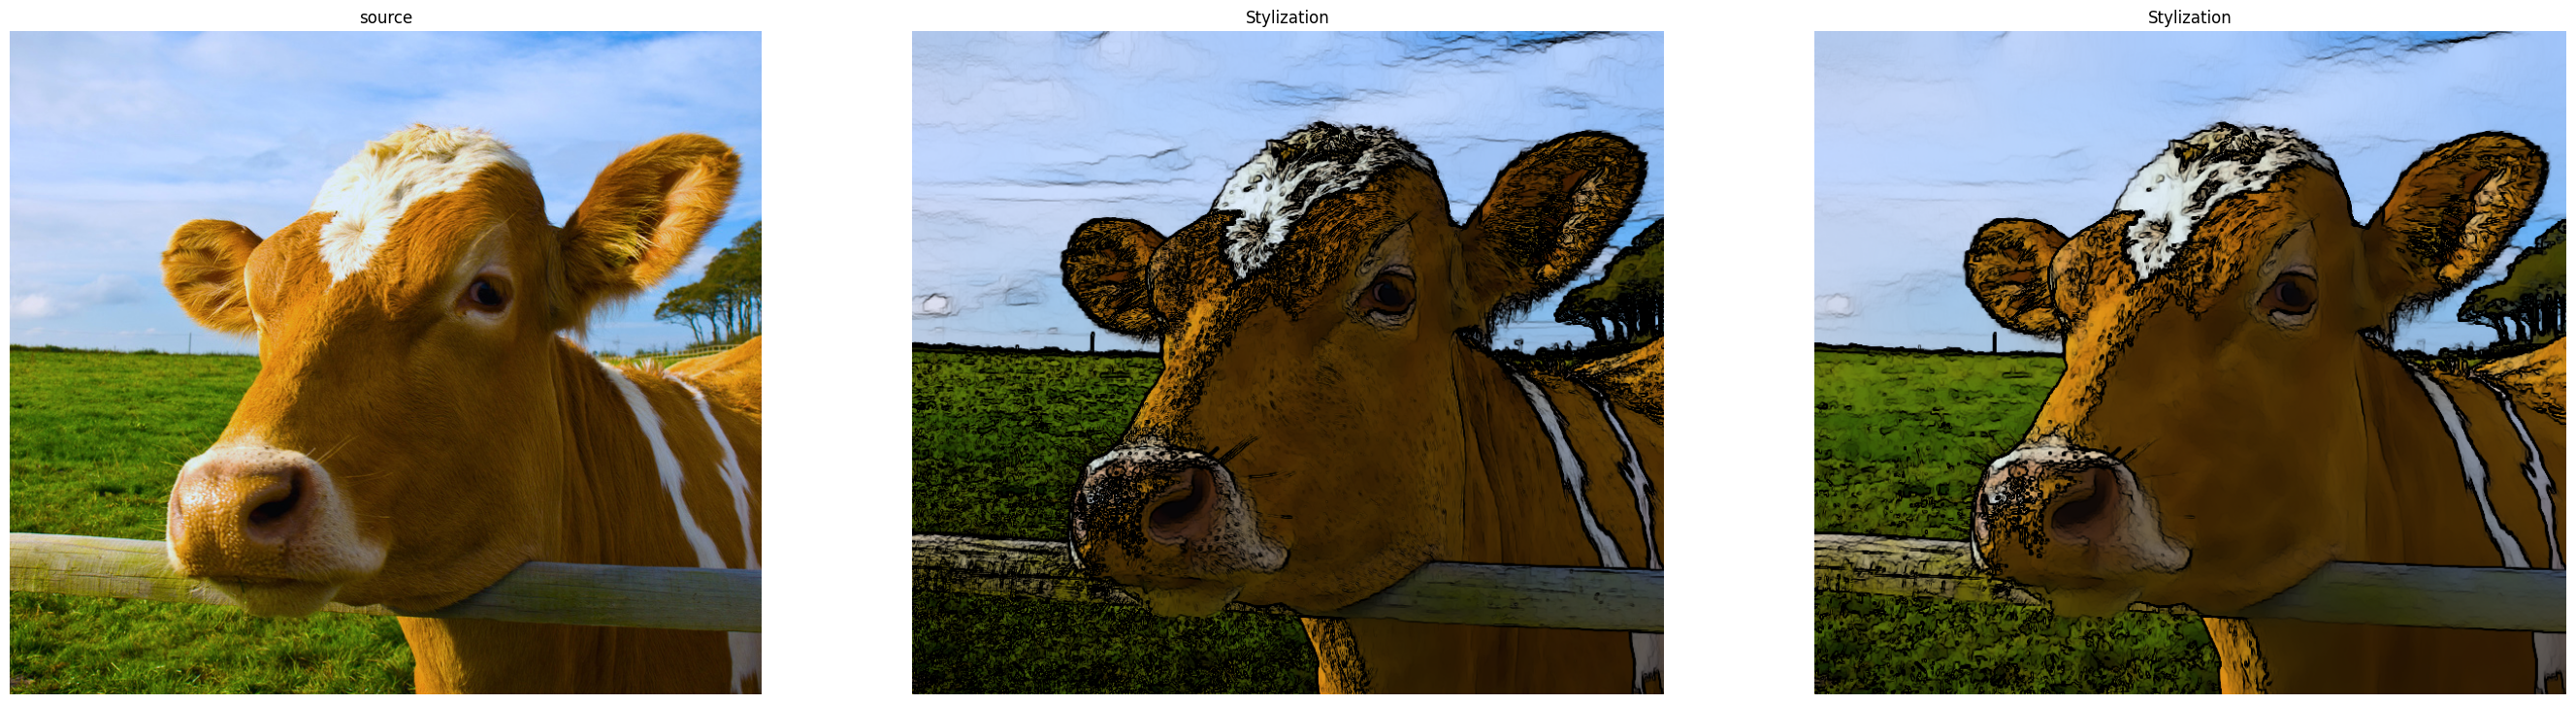

In [46]:
# 硬笔卡通画风格：成块状，块与块之间有明显的黑边

# 频域上的保边滤波（用了 edgePreservingFilter）
out1 = cv2.stylization(src, sigma_s=60, sigma_r=0.07)
out2 = cv2.stylization(src, sigma_s=60, sigma_r=0.20)


show_images([
    ('source', src),
    ('Stylization', out1),
    ('Stylization', out2),
], colnum=3, scale=10)

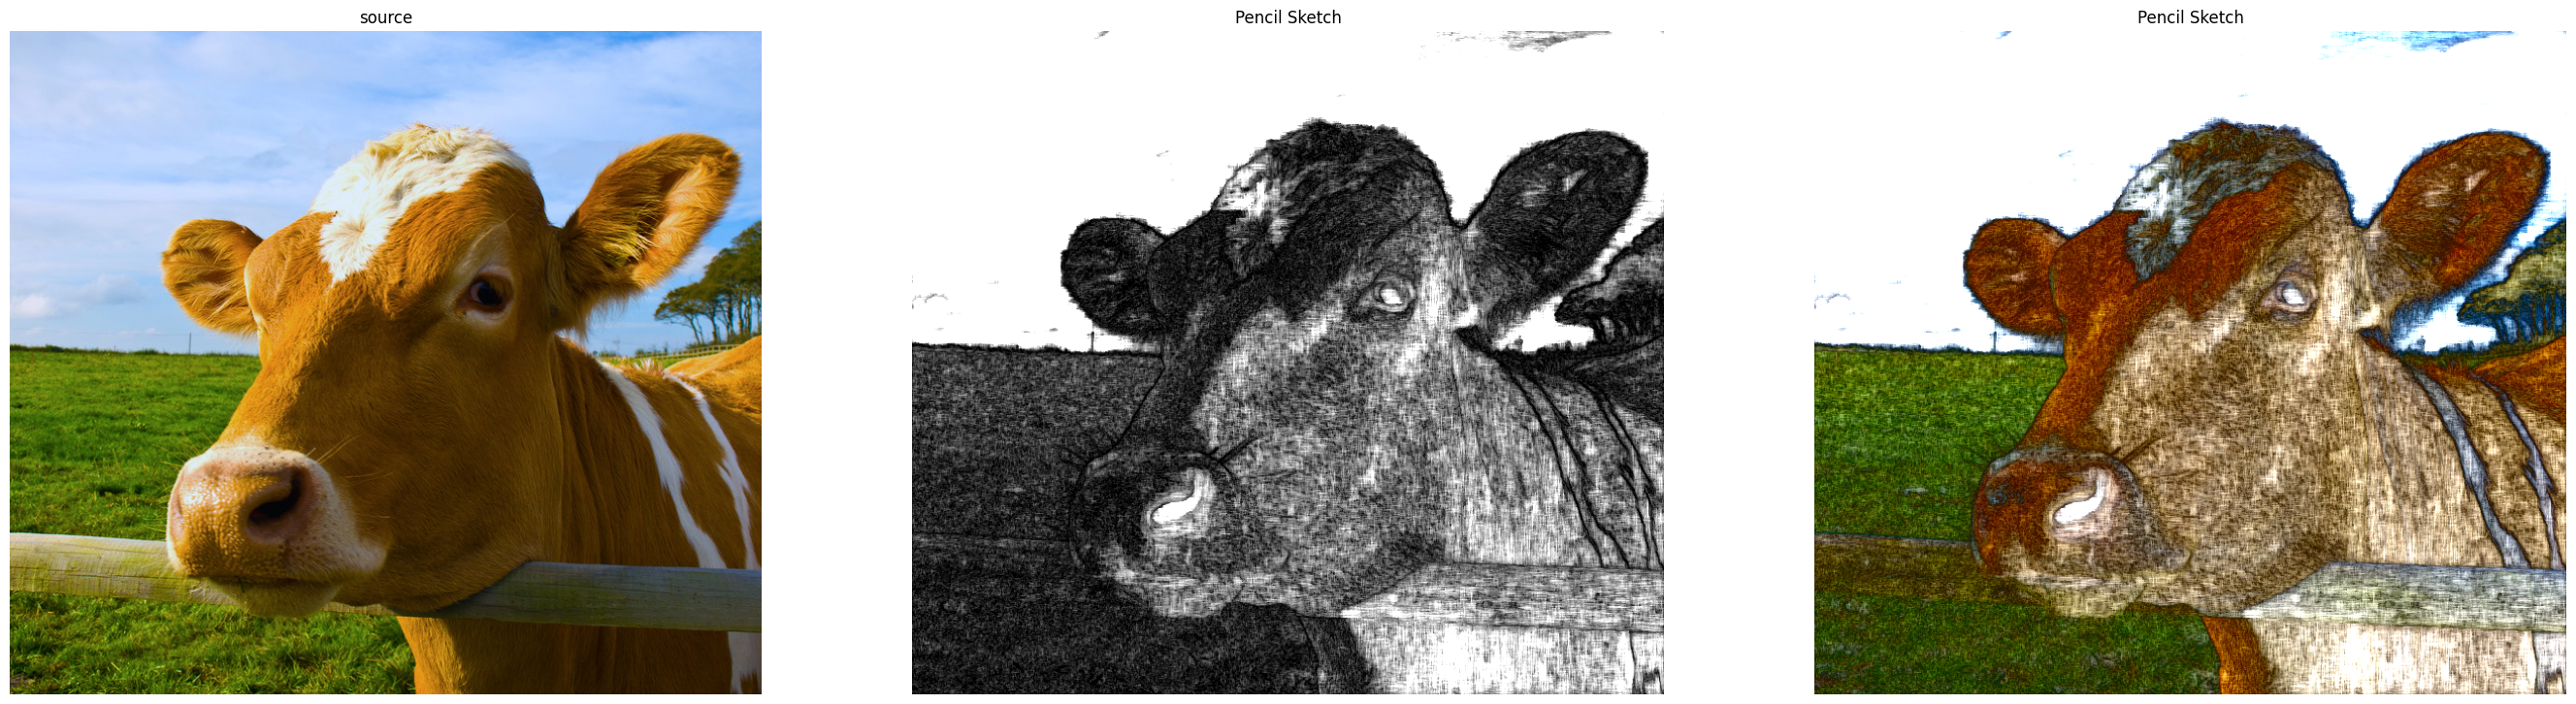

In [41]:
# 铅笔素描风格
dst_gray, dst_color = cv2.pencilSketch(src, sigma_s=60, sigma_r=0.07, shade_factor=0.05)

show_images([
    ('source', src),
    ('Pencil Sketch', dst_gray),
    ('Pencil Sketch', dst_color),
], colnum=3, scale=10)

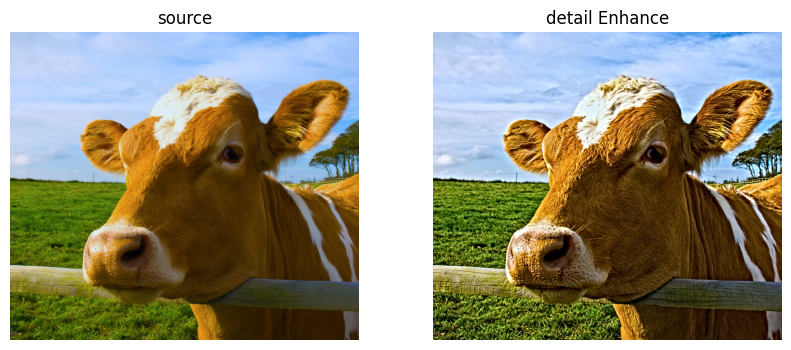

In [4]:
# 浮雕风格

# 本质上是对边缘进行锐化增强，这里直接用的 detailEnhance，背后是频率保边滤波 edgePreservingFilter
dst = cv2.detailEnhance(src, sigma_s=10, sigma_r=0.15)


show_images([
    ('source', src),
    ('detail Enhance', dst),
], colnum=3, scale=4)